[*********************100%***********************]  1 of 1 completed


Price           Close  SMA_short SMA_long Signal Trade    Return  \
Ticker           AAPL                                              
Date                                                               
2020-01-02  72.716064        NaN      NaN      0   NaN       NaN   
2020-01-03  72.009102        NaN      NaN      0   0.0 -0.009722   
2020-01-06  72.582909        NaN      NaN      0   0.0  0.007969   
2020-01-07  72.241554        NaN      NaN      0   0.0 -0.004703   
2020-01-08  73.403648        NaN      NaN      0   0.0  0.016086   
2020-01-09  74.962807        NaN      NaN      0   0.0  0.021241   
2020-01-10  75.132256        NaN      NaN      0   0.0  0.002260   
2020-01-13  76.737411        NaN      NaN      0   0.0  0.021364   
2020-01-14  75.701210        NaN      NaN      0   0.0 -0.013503   
2020-01-15  75.376801        NaN      NaN      0   0.0 -0.004285   
2020-01-16  76.320976        NaN      NaN      0   0.0  0.012526   
2020-01-17  77.165947        NaN      NaN      0

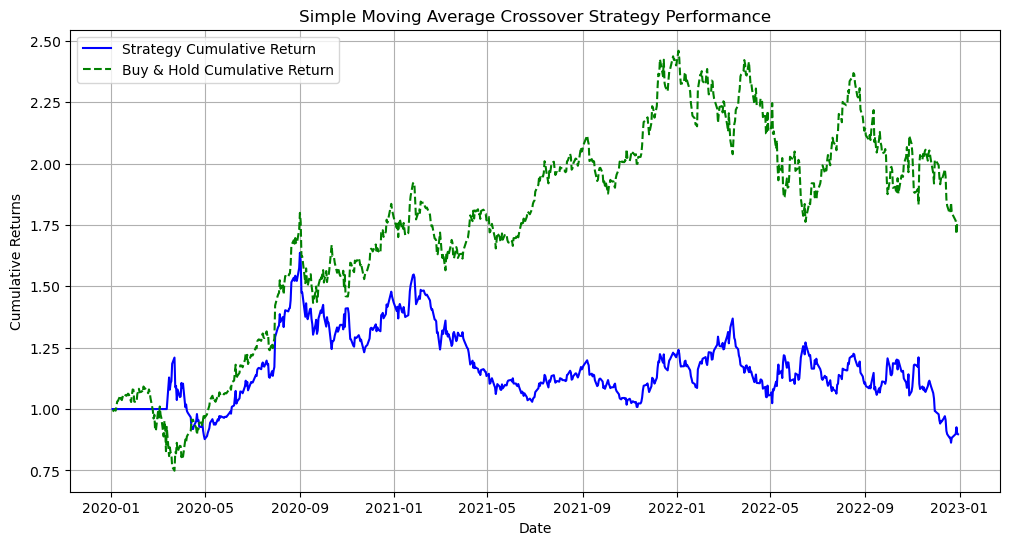

In [2]:

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

t = "AAPL"
data = yf.download(t, start="2020-01-01", end="2023-01-01")
data = data[['Close']]  # We'll use the 'Close' price for our analysis


data['SMA_short'] = data['Close'].rolling(window=20).mean()
data['SMA_long'] = data['Close'].rolling(window=50).mean()


data['Signal'] = 0
data.loc[data['SMA_short'] > data['SMA_long'], 'Signal'] = 1
data.loc[data['SMA_short'] < data['SMA_long'], 'Signal'] = -1

# Optional: Determine changes in signal to mark trade entry/exit points
data['Trade'] = data['Signal'].diff()


data['Return'] = data['Close'].pct_change()


data['Strategy_Return'] = data['Return'] * data['Signal'].shift(1)

data['Cumulative_Strategy'] = (1 + data['Strategy_Return']).cumprod()
data['Cumulative_BuyHold'] = (1 + data['Return']).cumprod()

print(data.head(30))

plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Strategy'], label='Strategy Cumulative Return', color='blue')
plt.plot(data['Cumulative_BuyHold'], label='Buy & Hold Cumulative Return', color='green', linestyle='--')
plt.title('Simple Moving Average Crossover Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
